In [1]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline

In [2]:
base = 'D:\\'
folder = 'codezero'
filename = 'BDL Daten Q1 2018.xlsx'
filepath = os.path.join(base,folder,filename)

In [3]:
#read data
df = pd.read_excel(filepath)

In [4]:
#data overview
df.head()

,Time,BDLHQBEC (BDL) A1-4 dew point KAT in A1d [°Ctd],BDLHQBEC (BDL) A2-1 pressure KAT in A2a [bar],BDLHQBEC (BDL) A3-1 pressure KAT out A3a [bar],BDLHQBEC (BDL) A4-1 dew point KAT out A4a [°C],BDLHQBEC (BDL) A4-4 dew point KAT out A4d [°Ctd],BDLHQBEC (BDL) B1-1 pressure x.x.x B1a [bar],BDLHQBEC (BDL) B2-1 oil vapor B2a [mg/m³],BDLHQBEC (BDL) B3-1 flow x.x.2 B3a [m³/h],BDLHQBEC (BDL) B3-2 flow x.x.2 B3b [m³],...,BDLHQBEC (BDL) C1-1 dew point x.x.2 C1a [°C],BDLHQBEC (BDL) C1-3 dew point x.x.2 C1c [°Ctd],BDLHQBEC (BDL) C2-1 pressure x.x.2 C2a [bar],BDLHQBEC (BDL) C3-3 dew point x.x.1 C3c [°Ctd],BDLHQBEC (BDL) C4-1 pressure after CP 3eco C4a [bar],BDLHQBEC (BDL) V1-1 V12 Verbrauch [m³],BDLHQBEC (BDL) V1-2 V12 Kosten [€],BDLHQBEC (BDL) V2-1 delta P KAT -- [bar],BDLHQBEC (BDL) V3-1 delta P Production hall -- [bar],BDLHQBEC (BDL) V4-1 delta P - CP 3eco -- [bar]
0,2018-01-01 02:00:00,19.781011,8.518670,8.514245,20.951681,15.797684,8.517483,0.003142,0.000207,217434.0,...,20.794175,3.765776,8.518884,2.863805,8.545260,238053.037851,4761.060768,0.004424,-0.001401,-0.027777
1,2018-01-01 04:00:00,19.779083,8.529885,8.527465,20.953493,16.366013,8.528903,0.003147,0.000418,217434.0,...,20.800768,3.761548,8.529960,2.613708,8.556639,238053.381979,4761.067639,0.002419,-0.001056,-0.027736
2,2018-01-01 06:00:00,19.772255,8.531616,8.530624,20.924437,17.039121,8.530272,0.003208,0.000380,217434.0,...,20.797668,3.737328,8.531561,2.524581,8.558697,238054.000000,4761.080078,0.000992,-0.001289,-0.028424
3,2018-01-01 08:00:00,19.814839,8.529017,8.527939,20.948803,16.855330,8.528292,0.003314,0.000232,217434.0,...,20.827061,3.748659,8.528961,2.548264,8.555543,238054.000000,4761.080078,0.001079,-0.000669,-0.027251
4,2018-01-01 10:00:00,19.849033,8.533390,8.532405,21.060192,17.144281,8.532699,0.003378,0.000418,217434.0,...,20.898639,3.779662,8.532805,2.746484,8.560103,238054.642238,4761.092935,0.000985,-0.000106,-0.027405


In [5]:
df.shape

(846, 22)

In [6]:
df.describe()

,BDLHQBEC (BDL) A1-4 dew point KAT in A1d [°Ctd],BDLHQBEC (BDL) A2-1 pressure KAT in A2a [bar],BDLHQBEC (BDL) A3-1 pressure KAT out A3a [bar],BDLHQBEC (BDL) A4-1 dew point KAT out A4a [°C],BDLHQBEC (BDL) A4-4 dew point KAT out A4d [°Ctd],BDLHQBEC (BDL) B1-1 pressure x.x.x B1a [bar],BDLHQBEC (BDL) B2-1 oil vapor B2a [mg/m³],BDLHQBEC (BDL) B3-1 flow x.x.2 B3a [m³/h],BDLHQBEC (BDL) B3-2 flow x.x.2 B3b [m³],BDLHQBEC (BDL) B4-1 flow x.x.1 B4a [m³/h],...,BDLHQBEC (BDL) C1-1 dew point x.x.2 C1a [°C],BDLHQBEC (BDL) C1-3 dew point x.x.2 C1c [°Ctd],BDLHQBEC (BDL) C2-1 pressure x.x.2 C2a [bar],BDLHQBEC (BDL) C3-3 dew point x.x.1 C3c [°Ctd],BDLHQBEC (BDL) C4-1 pressure after CP 3eco C4a [bar],BDLHQBEC (BDL) V1-1 V12 Verbrauch [m³],BDLHQBEC (BDL) V1-2 V12 Kosten [€],BDLHQBEC (BDL) V2-1 delta P KAT -- [bar],BDLHQBEC (BDL) V3-1 delta P Production hall -- [bar],BDLHQBEC (BDL) V4-1 delta P - CP 3eco -- [bar]
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,...,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,20.759120,9.300905,9.288792,22.672562,15.205249,9.299571,0.004496,44.959185,257804.214113,5.863065,...,21.683891,6.664429,9.166179,2.783102,9.297070,283987.928916,5679.758585,0.012113,0.133392,0.002501
std,1.159752,0.586804,0.593052,1.709778,5.828885,0.588027,0.001037,55.051902,23701.641445,11.262202,...,0.704103,5.001459,0.625675,0.677285,0.597601,27166.228734,543.324573,0.054455,0.198482,0.064645
min,16.091152,7.753967,7.707663,20.401392,-3.363402,7.750461,0.001818,0.000001,217434.000000,0.045477,...,20.181852,1.320785,7.457093,0.314977,7.611118,238053.037851,4761.060768,-0.249241,-0.003677,-0.041406
25%,20.039778,8.614920,8.634483,21.453277,11.539545,8.613542,0.003829,0.211789,236753.545611,0.300617,...,21.235240,2.719379,8.547258,2.499921,8.624855,258916.592743,5178.331929,0.001095,-0.000775,-0.037426
50%,20.681021,9.597698,9.553218,22.132559,16.936309,9.602945,0.004329,23.202209,257577.923314,0.518532,...,21.678055,4.287010,9.392177,2.731308,9.581297,284430.816604,5688.616281,0.014908,0.022556,-0.028057
75%,21.509584,9.683024,9.671753,23.490868,19.708661,9.680966,0.005118,90.867407,280372.550858,7.164013,...,22.088782,9.868452,9.642209,3.015674,9.691516,310147.762246,6202.955268,0.031022,0.228817,0.033973
max,24.197273,9.991402,9.978609,27.272369,23.945612,9.990781,0.009989,227.640951,293900.516963,82.693348,...,23.966612,20.328722,9.990527,5.256874,10.030741,324456.497686,6489.129869,0.351827,1.109742,0.736785


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 22 columns):
Time                                                     846 non-null datetime64[ns]
BDLHQBEC (BDL)
A1-4
dew point KAT in
A1d [°Ctd]
         846 non-null float64
BDLHQBEC (BDL)
A2-1
pressure KAT in
A2a [bar]
           846 non-null float64
BDLHQBEC (BDL)
A3-1
pressure KAT out
A3a [bar]
          846 non-null float64
BDLHQBEC (BDL)
A4-1
dew point KAT out
A4a [°C]
          846 non-null float64
BDLHQBEC (BDL)
A4-4
dew point KAT out
A4d [°Ctd]
        846 non-null float64
BDLHQBEC (BDL)
B1-1
pressure x.x.x
B1a [bar]
            846 non-null float64
BDLHQBEC (BDL)
B2-1
oil vapor
B2a [mg/m³]
               846 non-null float64
BDLHQBEC (BDL)
B3-1
flow x.x.2
B3a [m³/h]
               846 non-null float64
BDLHQBEC (BDL)
B3-2
flow x.x.2
B3b [m³]
                 846 non-null float64
BDLHQBEC (BDL)
B4-1
flow x.x.1
B4a [m³/h]
               846 non-null float64
BDLHQBEC (BDL)
B4-2
flow x.x.1

In [8]:
cols = df.columns

In [9]:
#remove newlines an redudent strings
newcol =[]
for i,j in enumerate(cols):
    newcol.append(re.sub('[\n\xa0]',' ',j).strip('BDLHQBEC (BDL)'))

In [10]:
df.columns = newcol

In [46]:
#set time as the index of the data frame
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

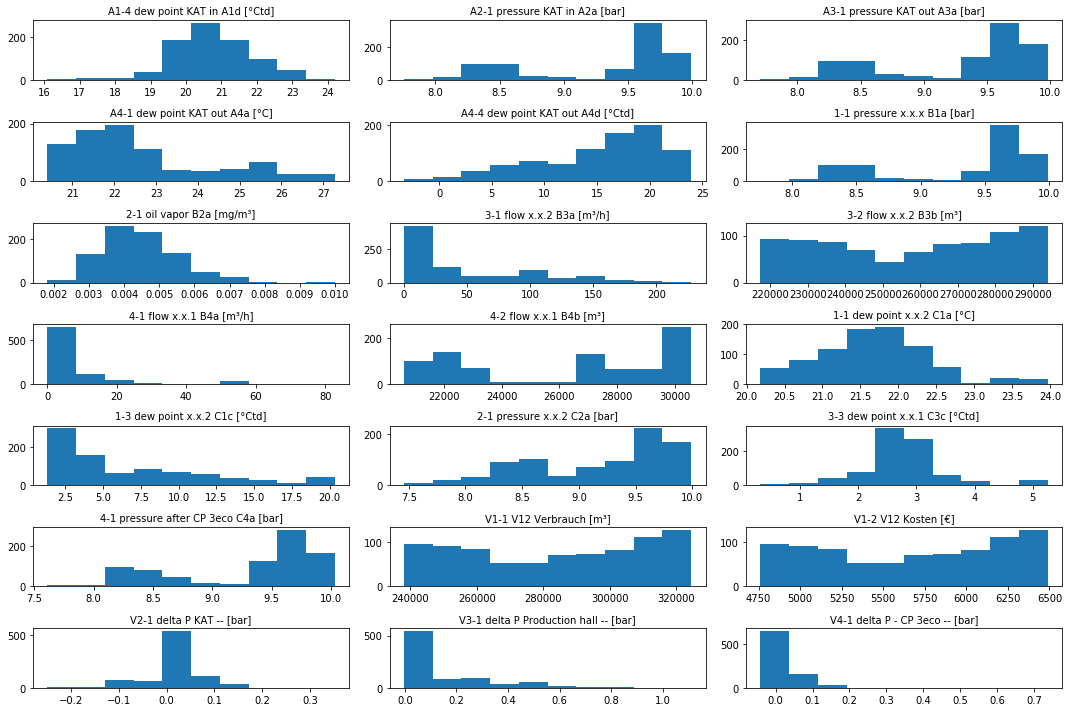

In [128]:
#explore histograms
fig, ax = plt.subplots(7,3,figsize=(15,10))
for irow, row in enumerate(np.array(newcol[1:]).reshape(7,3)):
    for jcol,col in enumerate(row):
        ax[irow][jcol].hist(df[col])
        ax[irow][jcol].set_title(col,size=10)
plt.tight_layout()

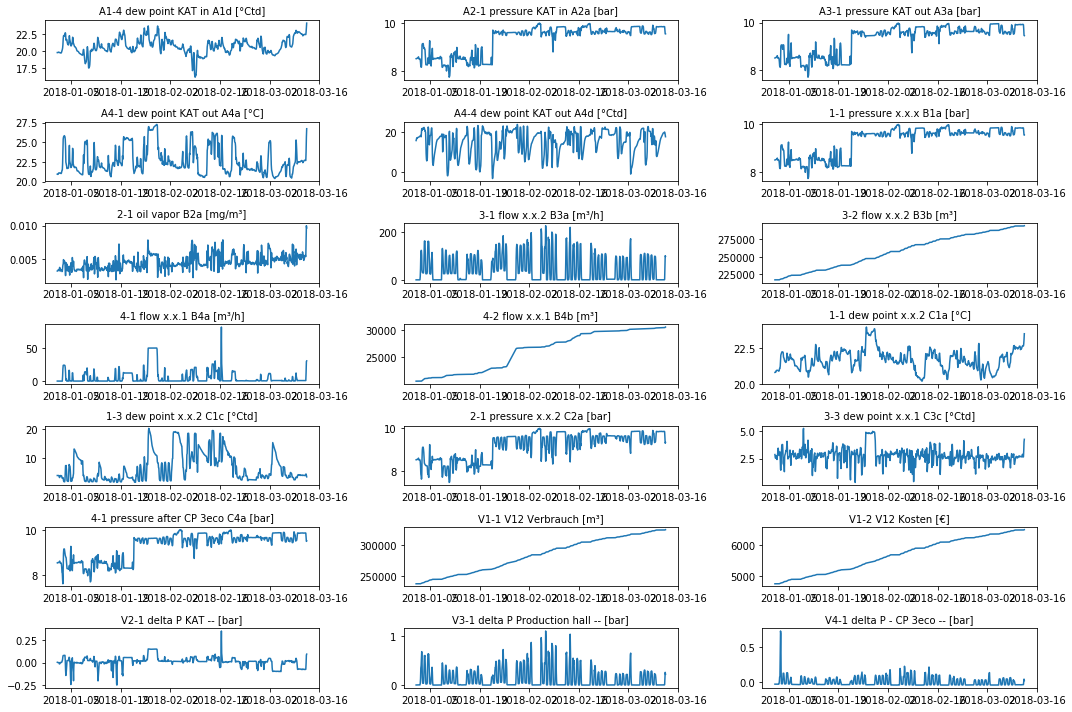

In [55]:
#plots variables against time
fig, ax = plt.subplots(7,3,figsize=(15,10))
for irow, row in enumerate(np.array(newcol[1:]).reshape(7,3)):
    for jcol,col in enumerate(row):
        ax[irow][jcol].plot(df[col])
        ax[irow][jcol].set_title(col,size=10)
plt.tight_layout()

In [73]:
normalized_df=(df-df.min())/(df.max()-df.min())

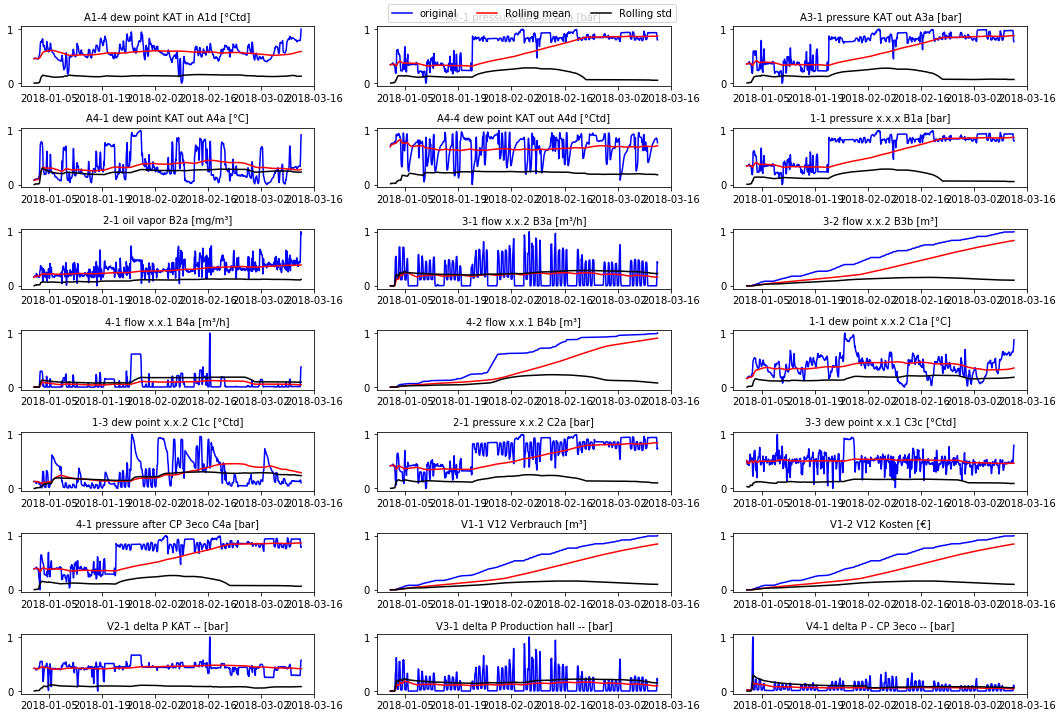

In [100]:
#explore rolling mean, and rolling std compared to original to see if it is possible to identify stationary and non stationary ts
fig, ax = plt.subplots(7,3,figsize=(15,10),)
for irow, row in enumerate(np.array(newcol[1:]).reshape(7,3)):
    for jcol,col in enumerate(row):
        ax[irow][jcol].plot(normalized_df[col],color='blue')
        ax[irow][jcol].plot(normalized_df[col].rolling('30D').mean(),color='red')
        ax[irow][jcol].plot(normalized_df[col].rolling('30D').std(), color='black')
        ax[irow][jcol].set_title(col,size=10)

plt.figlegend(('original','Rolling mean','Rolling std'), loc = 'upper center', ncol=5, labelspacing=0. )
plt.tight_layout()


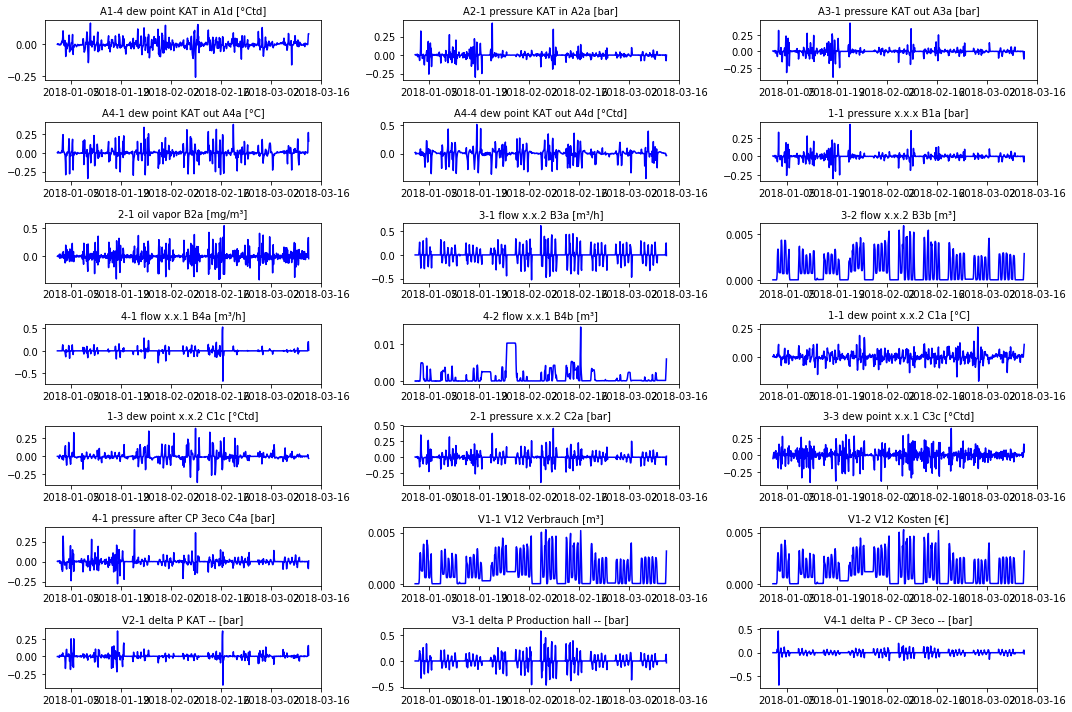

In [101]:
fig, ax = plt.subplots(7,3,figsize=(15,10))
for irow, row in enumerate(np.array(newcol[1:]).reshape(7,3)):
    for jcol,col in enumerate(row):
        ax[irow][jcol].plot(normalized_df[col].diff(),color='blue')
        ax[irow][jcol].set_title(col,size=10)

plt.tight_layout()

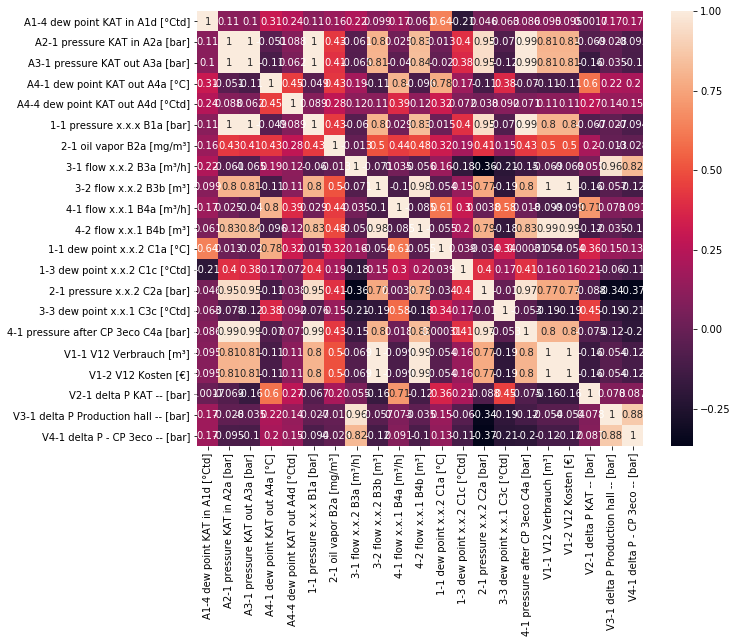

In [106]:
#explore correlation
plt.figure(figsize=(10,8))
sns.heatmap(normalized_df.corr(),annot=True)

In [115]:
df_corr = normalized_df.corr()

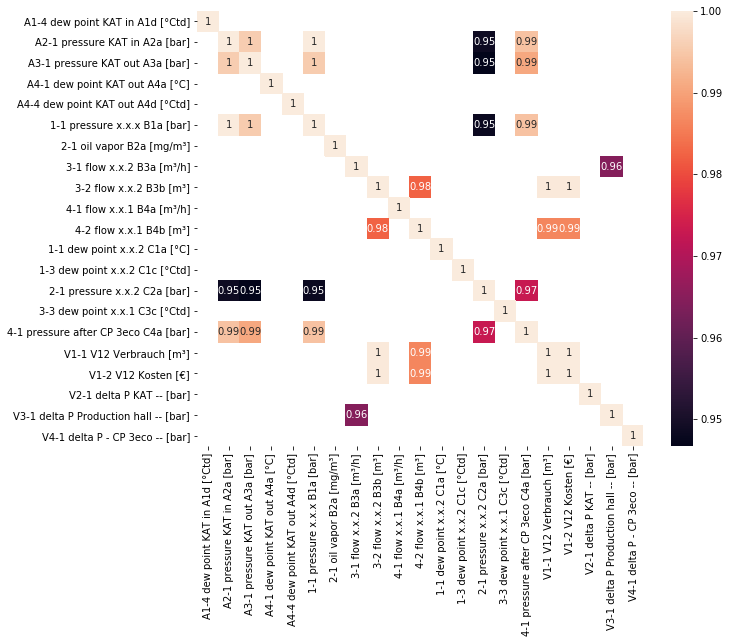

In [118]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr[df_corr>=0.9],annot=True)

# There are variables that are perfectly correlated, these could be similar devices. The other correlations are high but
# not perfect, could this be due to a different versions of the same device ? or is this difference is due to something else ?

In [155]:
# test of means
print('Testing difference of means between {} and {}'.format(newcol[2],newcol[14]))
print(scipy.stats.ttest_ind(normalized_df[newcol[2]],normalized_df[newcol[14]]))
print('Testing difference of means between {} and {}'.format(newcol[3],newcol[14]))
print(scipy.stats.ttest_ind(normalized_df[newcol[3]],normalized_df[newcol[14]]))
print('Testing difference of means between {} and {}'.format(newcol[6],newcol[14]))
print(scipy.stats.ttest_ind(normalized_df[newcol[6]],normalized_df[newcol[14]]))
print('Testing difference of means between {} and {}'.format(newcol[16],newcol[14]))
print(scipy.stats.ttest_ind(normalized_df[newcol[16]],normalized_df[newcol[14]]))

# the t-tests fail to reject the null hypothesis still at 5% for all

Testing difference of means between A2-1 pressure KAT in A2a [bar] and 2-1 pressure x.x.2 C2a [bar]
Ttest_indResult(statistic=1.3545564978867095, pvalue=0.1757399622770279)
Testing difference of means between A3-1 pressure KAT out A3a [bar] and 2-1 pressure x.x.2 C2a [bar]
Ttest_indResult(statistic=1.7503666232063293, pvalue=0.08023652553429991)
Testing difference of means between 1-1 pressure x.x.x B1a [bar] and 2-1 pressure x.x.2 C2a [bar]
Ttest_indResult(statistic=1.3603811903036316, pvalue=0.17389074152920453)
Testing difference of means between 4-1 pressure after CP 3eco C4a [bar] and 2-1 pressure x.x.2 C2a [bar]
Ttest_indResult(statistic=1.8462912871731842, pvalue=0.0650246836359053)


In [156]:
# test of means
print('Testing difference of means between {} and {}'.format(newcol[2],newcol[16]))
print(scipy.stats.ttest_ind(normalized_df[newcol[2]],normalized_df[newcol[16]]))
print('Testing difference of means between {} and {}'.format(newcol[3],newcol[16]))
print(scipy.stats.ttest_ind(normalized_df[newcol[3]],normalized_df[newcol[16]]))
print('Testing difference of means between {} and {}'.format(newcol[6],newcol[16]))
print(scipy.stats.ttest_ind(normalized_df[newcol[6]],normalized_df[newcol[16]]))

Testing difference of means between A2-1 pressure KAT in A2a [bar] and 4-1 pressure after CP 3eco C4a [bar]
Ttest_indResult(statistic=-0.43549540307984946, pvalue=0.6632584881231813)
Testing difference of means between A3-1 pressure KAT out A3a [bar] and 4-1 pressure after CP 3eco C4a [bar]
Ttest_indResult(statistic=-0.04374887906256297, pvalue=0.9651097448745728)
Testing difference of means between 1-1 pressure x.x.x B1a [bar] and 4-1 pressure after CP 3eco C4a [bar]
Ttest_indResult(statistic=-0.4289191746657376, pvalue=0.6680367123259543)


In [157]:
print('Testing difference of means between {} and {}'.format(newcol[9],newcol[11]))
print(scipy.stats.ttest_ind(normalized_df[newcol[9]],normalized_df[newcol[11]]))

Testing difference of means between 3-2 flow x.x.2 B3b [m³] and 4-2 flow x.x.1 B4b [m³]
Ttest_indResult(statistic=-1.9811638957971829, pvalue=0.047734751687011)


In [189]:
cost_corr_index = normalized_df.corr()[newcol[18]][normalized_df.corr()[newcol[18]]>=0.8].index
normalized_df.corr()[newcol[18]][normalized_df.corr()[newcol[18]]>=0.8]
# interestingly, the t-test showed a difference in the means between 3-2 flow x.x.2 B3b [m³] and 4-2 flow x.x.1 B4b [m³]
# and they are both correlating highly with the cost

A2-1 pressure KAT in A2a [bar]          0.805373
A3-1 pressure KAT out A3a [bar]         0.811204
1-1 pressure x.x.x B1a [bar]            0.804602
3-2 flow x.x.2 B3b [m³]                 0.999708
4-2 flow x.x.1 B4b [m³]                 0.986640
4-1 pressure after CP 3eco C4a [bar]    0.804172
V1-1 V12 Verbrauch [m³]                 1.000000
V1-2 V12 Kosten [€]                     1.000000
Name: V1-2 V12 Kosten [€], dtype: float64

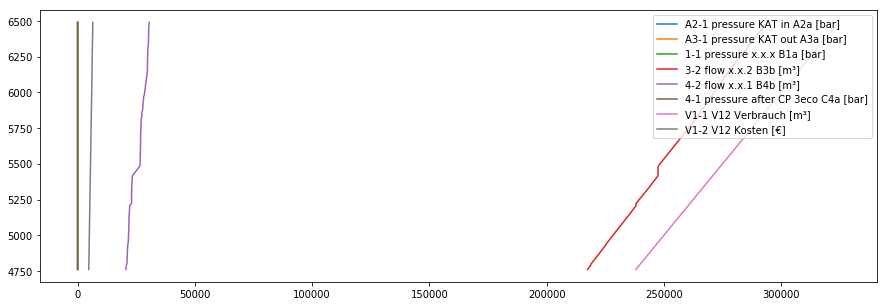

In [192]:
plt.figure(figsize=(15,5))
for i in cost_corr_index:
    plt.plot(df[i],df[newcol[18]],label=i)
    plt.legend(loc='upper right')

In [187]:
cost_invcorr_index = normalized_df.corr()[newcol[18]][normalized_df.corr()[newcol[18]]<0].index
normalized_df.corr()[newcol[18]][normalized_df.corr()[newcol[18]]<0]

A4-1 dew point KAT out A4a [°C]         -0.107782
3-1 flow x.x.2 B3a [m³/h]               -0.068954
4-1 flow x.x.1 B4a [m³/h]               -0.098926
1-1 dew point x.x.2 C1a [°C]            -0.054331
3-3 dew point x.x.1 C3c [°Ctd]          -0.191119
V2-1 delta P KAT -- [bar]               -0.155902
V3-1 delta P Production hall -- [bar]   -0.054106
V4-1 delta P - CP 3eco -- [bar]         -0.115190
Name: V1-2 V12 Kosten [€], dtype: float64

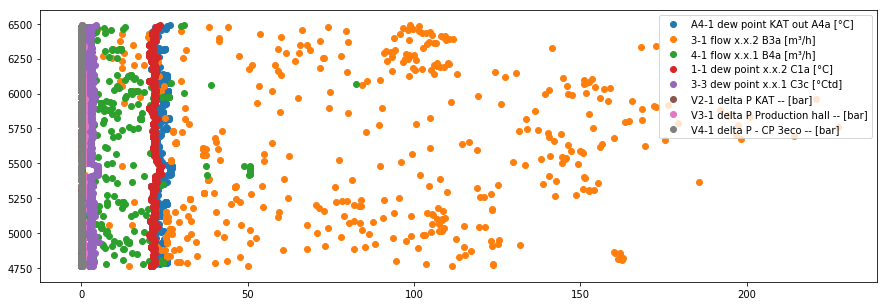

In [194]:
plt.figure(figsize=(15,5))
for i in cost_invcorr_index:
    plt.scatter(df[i],df[newcol[18]],label=i)
    plt.legend(loc='upper right')

In [198]:
normalized_df.drop(newcol[18],axis=1).corr()[newcol[17]][normalized_df.drop(newcol[18],axis=1).corr()[newcol[17]]>=0.8]

A2-1 pressure KAT in A2a [bar]          0.805373
A3-1 pressure KAT out A3a [bar]         0.811204
1-1 pressure x.x.x B1a [bar]            0.804602
3-2 flow x.x.2 B3b [m³]                 0.999708
4-2 flow x.x.1 B4b [m³]                 0.986640
4-1 pressure after CP 3eco C4a [bar]    0.804172
V1-1 V12 Verbrauch [m³]                 1.000000
Name: V1-1 V12 Verbrauch [m³], dtype: float64

In [199]:
normalized_df.drop(newcol[18],axis=1).corr()[newcol[17]][normalized_df.drop(newcol[18],axis=1).corr()[newcol[17]]<0]

A4-1 dew point KAT out A4a [°C]         -0.107782
3-1 flow x.x.2 B3a [m³/h]               -0.068954
4-1 flow x.x.1 B4a [m³/h]               -0.098926
1-1 dew point x.x.2 C1a [°C]            -0.054331
3-3 dew point x.x.1 C3c [°Ctd]          -0.191119
V2-1 delta P KAT -- [bar]               -0.155902
V3-1 delta P Production hall -- [bar]   -0.054106
V4-1 delta P - CP 3eco -- [bar]         -0.115190
Name: V1-1 V12 Verbrauch [m³], dtype: float64

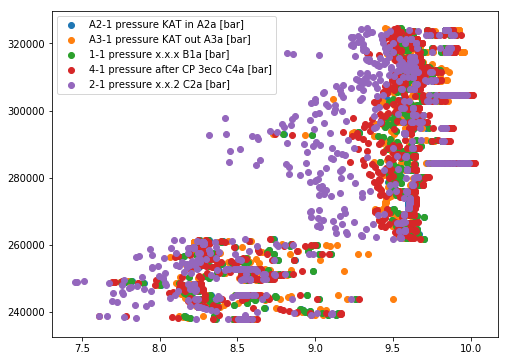

In [221]:
plt.figure(figsize=(8,6))
for i in [newcol[2],newcol[3],newcol[6],newcol[16],newcol[14]]:
    plt.scatter(df[i],df[newcol[17]],label=i)
    plt.legend(loc='upper left'),

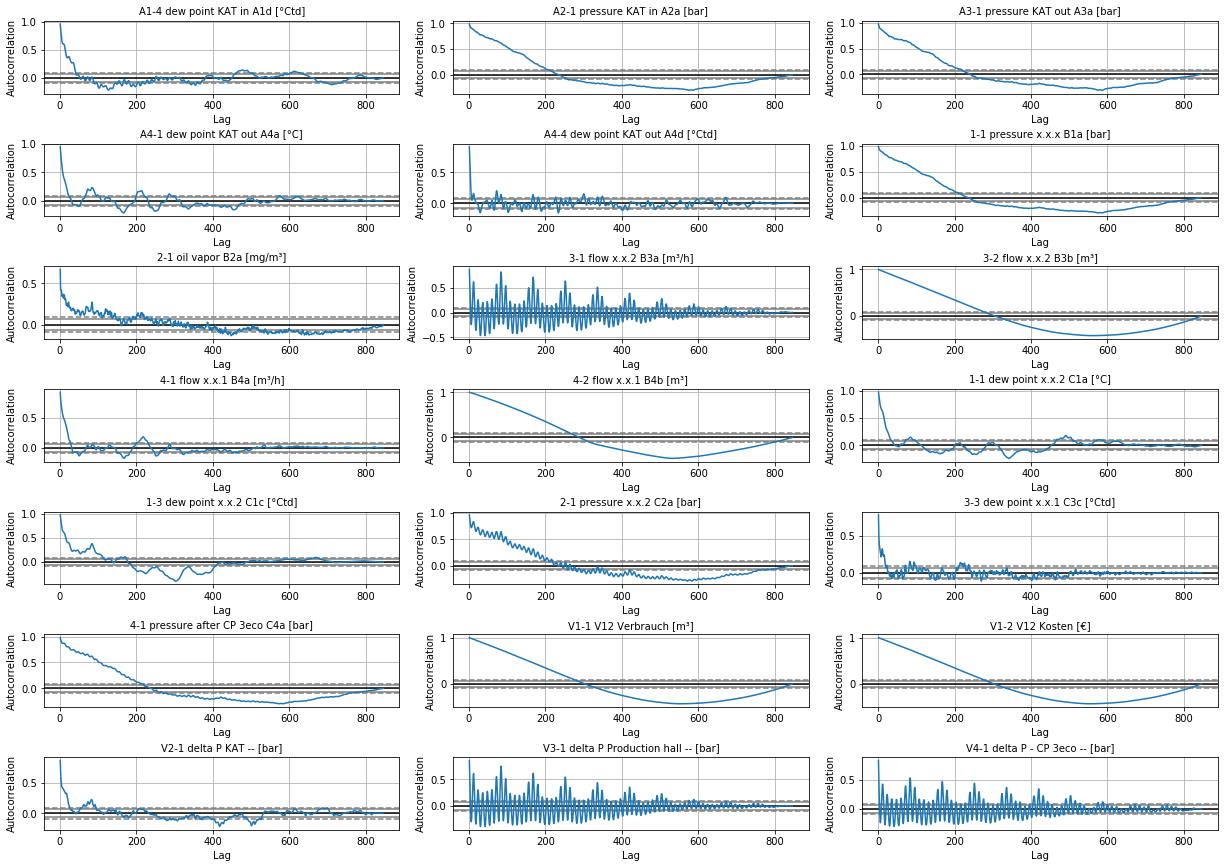

In [158]:
# Exploring autocorrelation
fig, ax = plt.subplots(7,3,figsize=(17,12))
for irow, row in enumerate(np.array(newcol[1:]).reshape(7,3)):
    for jcol,col in enumerate(row):
        pd.plotting.autocorrelation_plot(normalized_df[col],ax=ax[irow][jcol])
        ax[irow][jcol].set_title(col,size=10)

plt.tight_layout(pad=0.5)

